In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from matplotlib import rcParams


def get_sterror(data,subgroup):
    try:
        return data.loc[subgroup,:].std()/np.sqrt(len(data.loc[subgroup,:]))
    except:
        return data[subgroup].std()/np.sqrt(len(data[subgroup]))
    
#Loading data
filename_input = 'database_subjectiver.csv'

result = pd.read_csv(filename_input,sep=',')

group1 = result['Condition_x_first']=='Reskrypcja'
group2 = result['Condition_x_first']=='Reskrypcja10'
group3 = result['Condition_x_first']=='Ekspozycja'
group4 = result['Condition_x_first']=='CFT'
group_12 = group1 | group2

# result.head()

In [2]:

result['Condition_x_first'] = result['Condition_x_first'].replace({'Reskrypcja10':'Rescripting 10',
                                                                   'Reskrypcja':'Rescripting',
                                                                   'Ekspozycja':'Exposure'})

<Figure size 1440x2160 with 0 Axes>

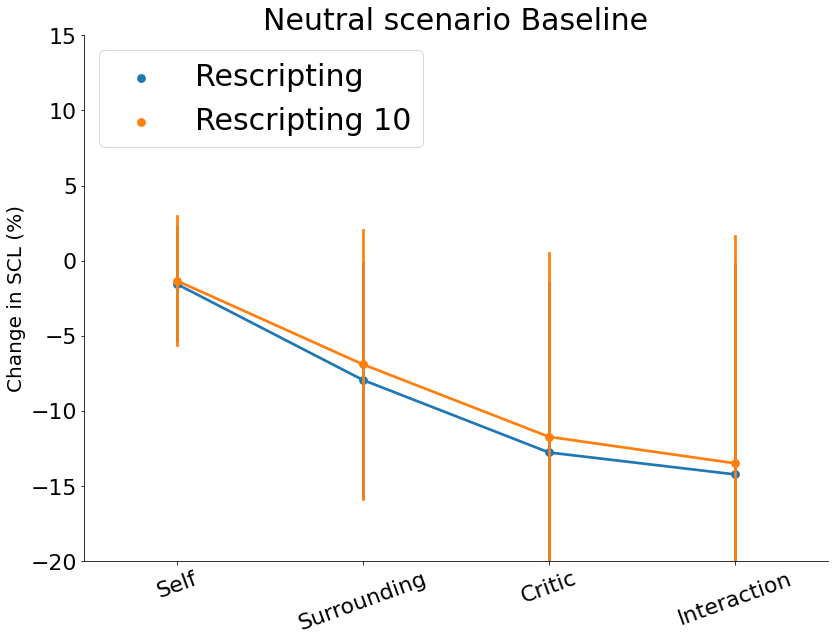

<Figure size 1440x2160 with 0 Axes>

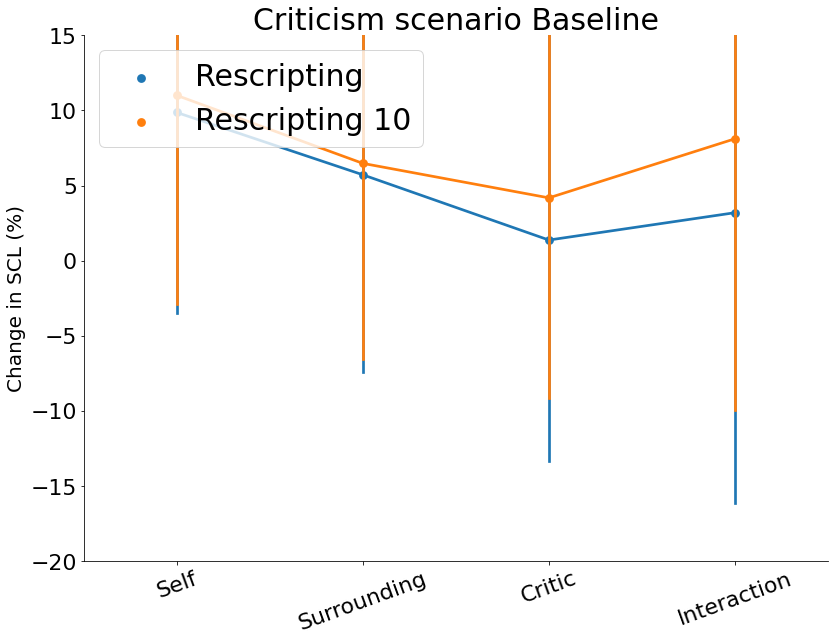

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

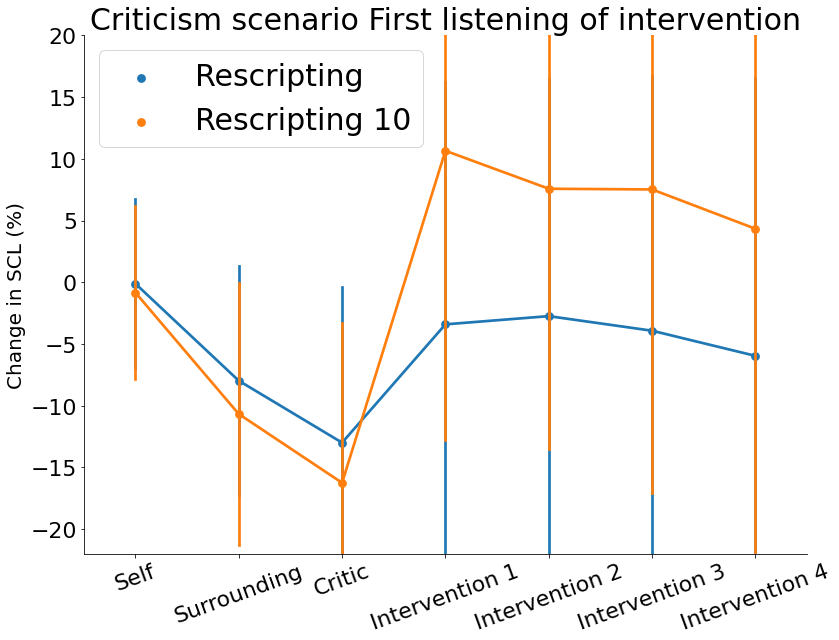

<Figure size 1440x2160 with 0 Axes>

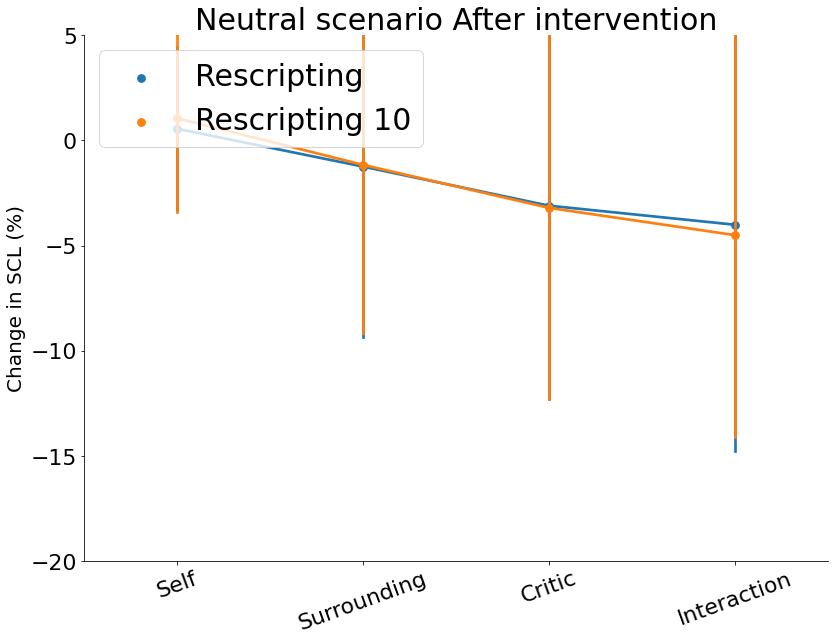

<Figure size 1440x2160 with 0 Axes>

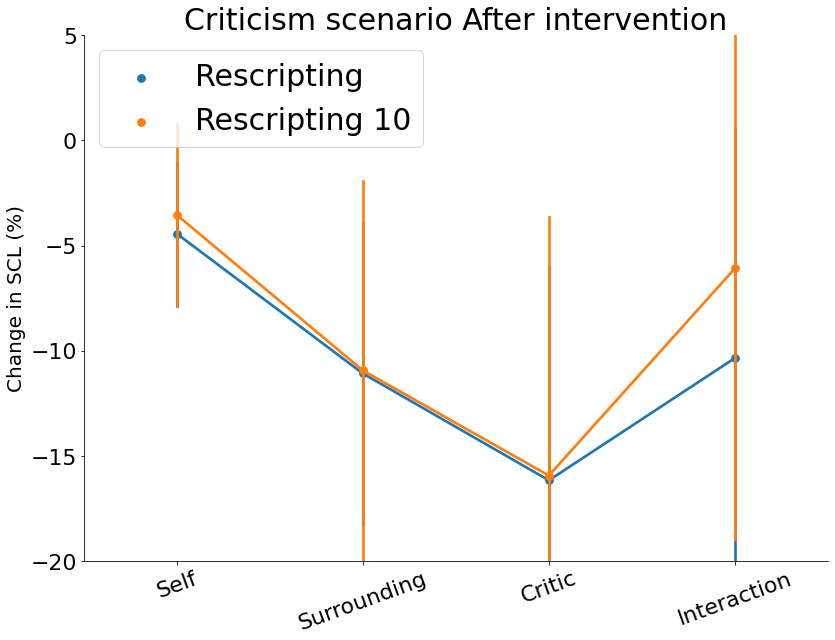

<Figure size 1440x2160 with 0 Axes>

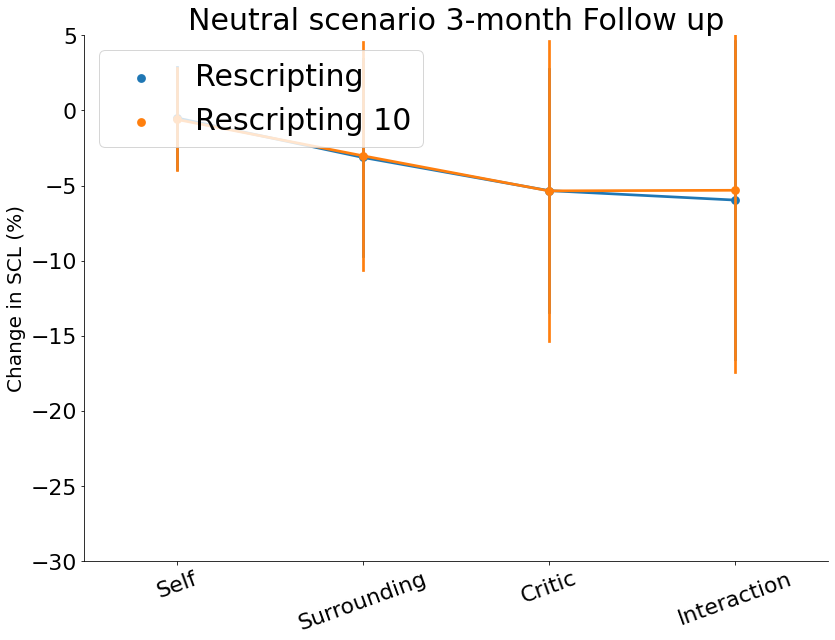

<Figure size 1440x2160 with 0 Axes>

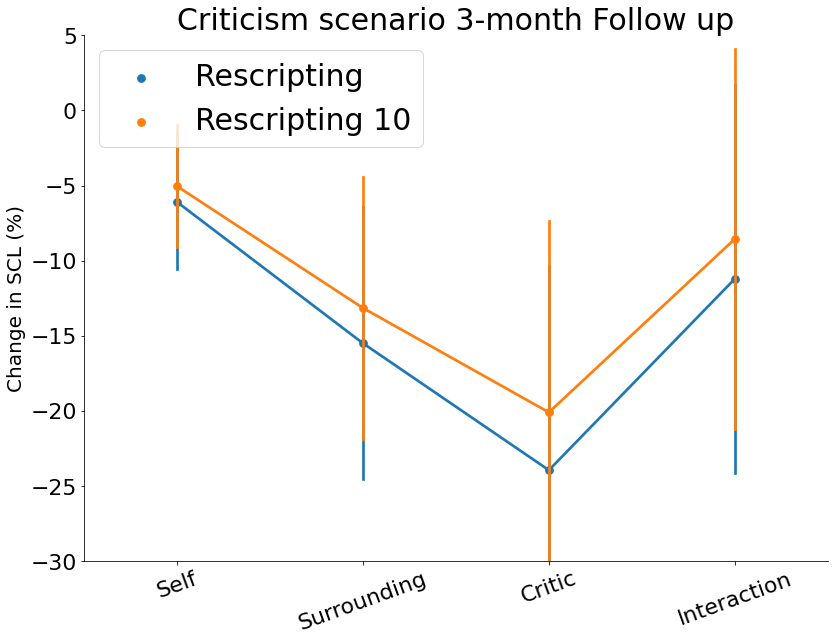

<Figure size 1440x2160 with 0 Axes>

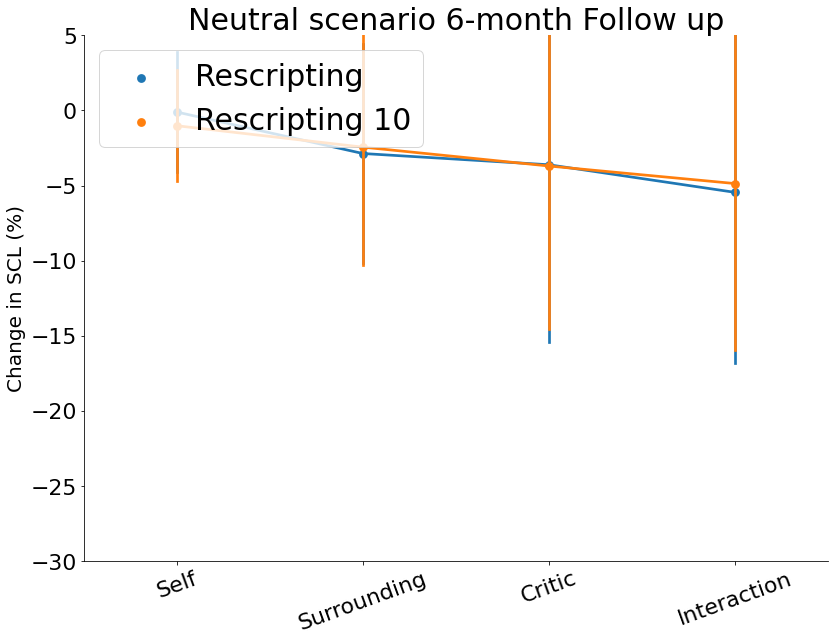

<Figure size 1440x2160 with 0 Axes>

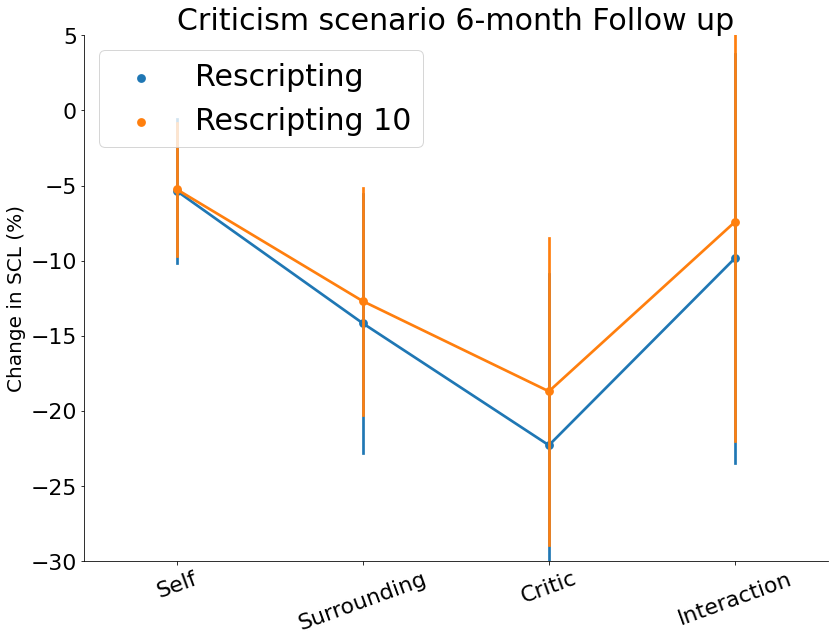

In [3]:
time_point = {'TP1':['Baseline',[-20,15]],
              'TP2':['First listening of intervention',[-22,20]],
              'TP63':['After intervention',[-20,5]],
             'TP73':['3-month Follow up',[-30,5]],
             'TP83':['6-month Follow up',[-30,5]]}
scenario = {'Neut':'Neutral scenario','CritT':'Criticism scenario'}

colset_dict = {'TP1':['Self','Surrounding','Critic','Interaction'],
              'TP2':['Self','Surrounding','Critic','Intervention 1', 'Intervention 2','Intervention 3','Intervention 4'],
              'TP63':['Self','Surrounding','Critic','Interaction'],
              'TP73':['Self','Surrounding','Critic','Interaction'],
              'TP83':['Self','Surrounding','Critic','Interaction']}

tp = 'TP73'
cond = 'Neut'

for tpoint in list(time_point.keys()):
    for scen in list(scenario.keys()):
        try:
            tp = tpoint
            tp_formal = time_point[tp][0]
            scen_formal = scenario[scen]
            cond = scen
            group = group_12
            title = f'{scen_formal} {tp_formal}'
            ylab = 'Change in SCL (%)'

            plt.figure(figsize=(20,30))

            tmp = result.loc[group,result.columns.str.contains(fr'SCL_{tp}_{cond}_P.*')]
            tmp.columns = colset_dict[tpoint]
            tmp['Condition'] = result['Condition_x_first']
            tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
            sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='sd'
                        ,height=9, aspect=1.3,legend=False)


            plt.xlabel('',fontsize=20)
            plt.ylabel(ylab,fontsize=20)
            plt.xticks(fontsize=22,rotation=20)
            plt.yticks(fontsize=22)
            plt.title(title,fontsize=30)

            plt.ylim(time_point[tp][1])
            plt.legend(loc='upper left',fontsize=30)

            plt.tight_layout()
            plt.savefig(f'{scen_formal} {tp_formal}.png')
        except:
            pass
plt.show()

<Figure size 1440x2160 with 0 Axes>

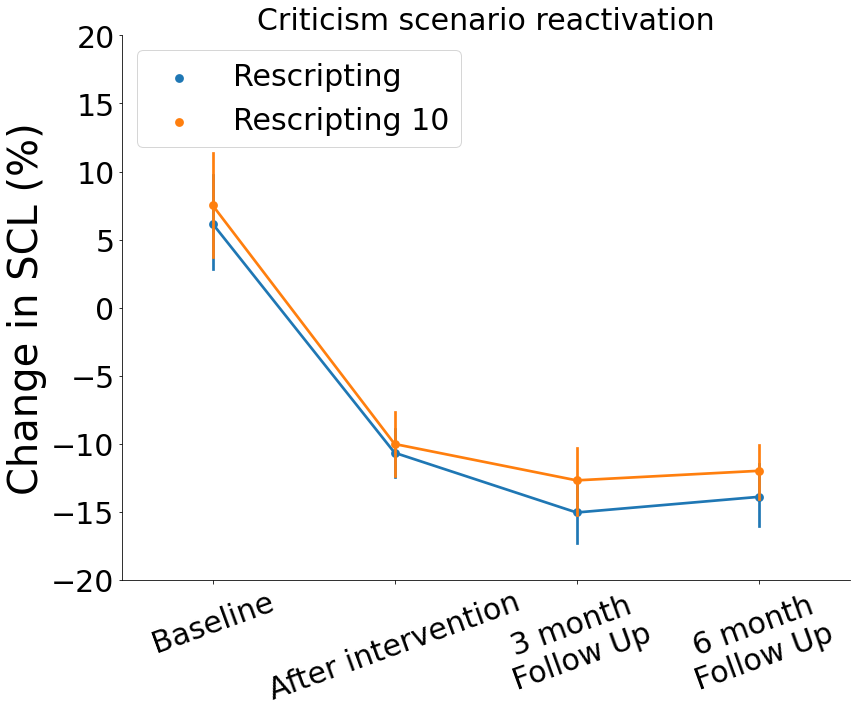

In [4]:

cond = 'CritT'
group = group_12
title = f'{scen_formal} {tp_formal}'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
ylab = 'Change in SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Baseline','After intervention','3 month\nFollow Up','6 month\nFollow Up']
# colnames = ['Pomiar bazowy','Po interwencji']
part_suspence='suspence'
title = f'Criticism scenario reactivation'

plt.figure(figsize=(20,30))

tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
# tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP\d_{cond}_{part_suspeaance}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]

# tmp.columns = ['Ja','Otoczenie','Krytyk','Interwencja 1','Interwencja 2','Interwencja 3','Interwencja 4']
tmp.columns = colnames
tmp['Condition'] = result['Condition_x_first']
tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='ci',height=10, aspect=1.2,legend=False)


plt.xlabel('',fontsize=40)
plt.ylabel(ylab,fontsize=40)
plt.xticks(fontsize=30,rotation=20)
plt.yticks(fontsize=30)
plt.title(title,fontsize=30)

plt.ylim([-20,20])
plt.legend(loc='upper left',fontsize=30)

plt.tight_layout()
plt.savefig(f'{title}.png')

<Figure size 1440x2160 with 0 Axes>

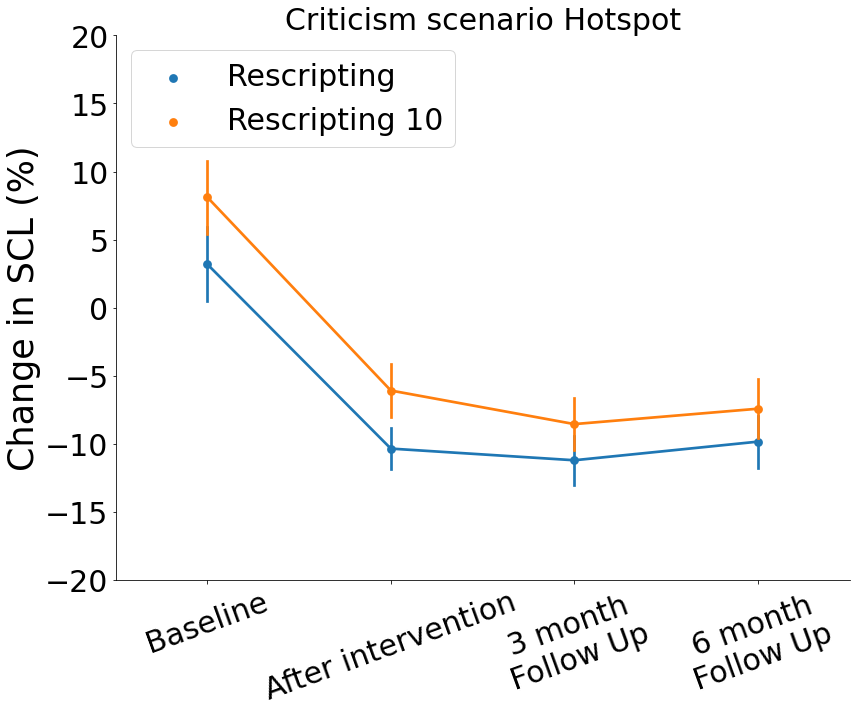

In [5]:

cond = 'CritT'
group = group_12
title = f'{scen_formal} {tp_formal}'
ylab = 'Change in SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Baseline','After intervention','3 month\nFollow Up','6 month\nFollow Up']
# colnames = ['Pomiar bazowy','3 mies.\nFollow Up']
# colnames = ['Pomiar bazowy','Po interwencji']
part_suspence='P4'
title = f'Criticism scenario Hotspot'

plt.figure(figsize=(20,30))

tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
# tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP\d_{cond}_{part_suspeaance}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]

# tmp.columns = ['Ja','Otoczenie','Krytyk','Interwencja 1','Interwencja 2','Interwencja 3','Interwencja 4']
tmp.columns = colnames
tmp['Condition'] = result['Condition_x_first']
tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se',height=10, aspect=1.2,legend=False)


plt.xlabel('',fontsize=35)
plt.ylabel(ylab,fontsize=35)
plt.xticks(fontsize=30,rotation=20)
plt.yticks(fontsize=30)
plt.title(title,fontsize=30)

plt.ylim([-20,20])
plt.legend(loc='upper left',fontsize=30)

plt.tight_layout()
plt.savefig(f'{title}.png')

In [6]:
# part = 'suspence_mean'
part = '4'
cond = 'CritT'
tp1 = result.loc[:,result.columns.str.contains(fr'rat_TP1_{cond}_.*{part}')].iloc[:,2:-2]
tp2 = result.loc[:,result.columns.str.contains(fr'rat_TP2_{cond}_.*{part}')].iloc[:,2:-2]
tp3 = result.loc[:,result.columns.str.contains(fr'rat_TP3_{cond}_.*{part}')].iloc[:,2:-2]
tp4 = result.loc[:,result.columns.str.contains(fr'rat_TP4_{cond}_.*{part}')].iloc[:,2:-2]

tp5 = result.loc[:,result.columns.str.contains(fr'rat_TP5_{cond}_.*{part}')].iloc[:,2:-2]
tp6 = result.loc[:,result.columns.str.contains(fr'rat_TP6_{cond}_.*{part}')].iloc[:,2:-2]
tp7 = result.loc[:,result.columns.str.contains(fr'rat_TP7_{cond}_.*{part}')].iloc[:,2:-2]
tp8 = result.loc[:,result.columns.str.contains(fr'rat_TP8_{cond}_.*{part}')].iloc[:,2:-2]
group_12
# tp1.loc[group_12,:]
tp1

,rat_TP1_CritT_P4_HAP_mean,rat_TP1_CritT_P4_ANG_mean,rat_TP1_CritT_P4_SAD_mean,rat_TP1_CritT_P4_FEA_mean,rat_TP1_CritT_P4_GUI_mean,rat_TP1_CritT_P4_DIS_mean
0,1.0,3.0,1.0,1.0,1.0,1.0
1,1.0,4.0,7.0,8.0,8.0,6.0
2,1.0,6.0,6.0,6.0,4.0,5.0
3,1.0,1.0,9.0,5.0,9.0,5.0
4,1.0,1.0,5.0,6.0,9.0,1.0
...,...,...,...,...,...,...
170,1.0,4.0,4.0,5.0,4.0,5.0
171,1.0,5.0,1.0,1.0,1.0,6.0
172,1.0,8.0,6.0,1.0,6.0,6.0
173,1.0,9.0,9.0,7.0,6.0,8.0


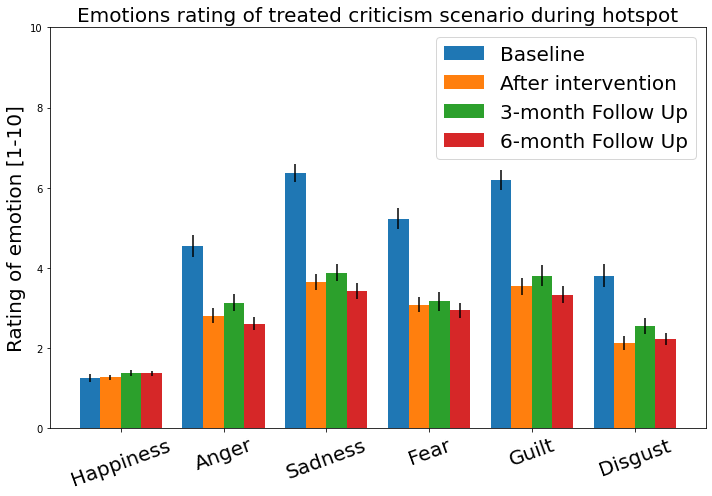

In [7]:
plt.figure(figsize=[10,7])
X = np.arange(len(tp1.T))

plt.bar(X-0.3,tp1.loc[group_12,:].mean(),0.2,label='Baseline',yerr=get_sterror(tp1,group_12))

plt.bar(X-0.1,tp6.loc[group_12,:].mean(),0.2,label='After intervention',yerr=get_sterror(tp6,group_12))

plt.bar(X+0.1,tp7.loc[group_12,:].mean(),0.2,label='3-month Follow Up',yerr=get_sterror(tp7,group_12))

plt.bar(X+0.3,tp8.loc[group_12,:].mean(),0.2,label='6-month Follow Up',yerr=get_sterror(tp8,group_12))


plt.xticks(X, ['Happiness','Anger','Sadness','Fear','Guilt','Disgust'],fontsize=20,rotation=20)
plt.legend(fontsize = 20)
plt.title('Emotions rating of treated criticism scenario during hotspot',fontsize=20)
plt.ylabel('Rating of emotion [1-10]',fontsize=20)
plt.ylim([0,10])

plt.tight_layout()
plt.savefig('Emotions_rating_CritT.png')

In [8]:
#Set which part of scenario, and which modality
part = 'P4'
arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_.*{part}_ARO*')]
group_12

C:\Users\skarkosz\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0       True
1      False
2      False
3       True
4       True
       ...  
170     True
171    False
172     True
173     True
174    False
Name: Condition_x_first, Length: 175, dtype: bool

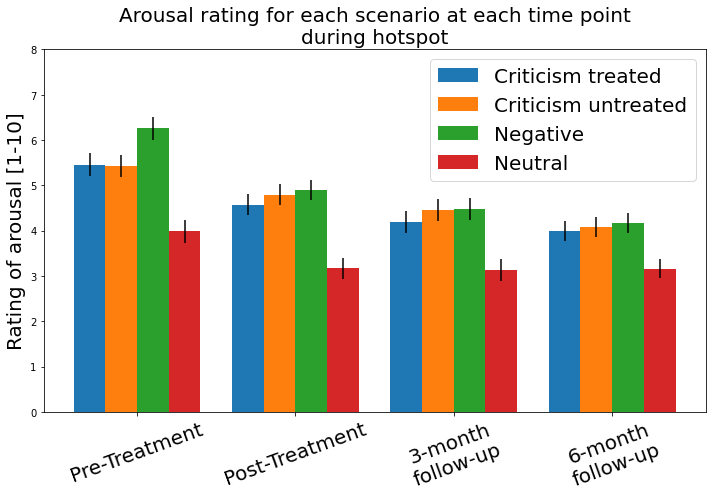

In [37]:
plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')].mean(),0.2,label='Criticism treated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X-0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Crit_')].mean(),0.2,label='Criticism untreated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X+0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neg')].mean(),0.2,label='Negative',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X+0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neut')].mean(),0.2,label='Neutral',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))


plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.legend(fontsize = 20)
plt.title('Arousal rating for each scenario at each time point\nduring hotspot',fontsize=20)
plt.ylabel('Rating of arousal [1-10]',fontsize=20)
plt.ylim([0,8])

plt.tight_layout()
plt.savefig('Emotions_rating_diff_scenario_hotspot.png')

In [38]:

arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_ARO_suspence.*')]
arousal_scenarios

<ipython-input-38-18c729073b48>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_ARO_suspence.*')]


,rat_TP1_CritT_ARO_suspence_mean,rat_TP1_Crit_ARO_suspence_mean,rat_TP1_Neg_ARO_suspence_mean,rat_TP1_Neut_ARO_suspence_mean,rat_TP6_CritT_ARO_suspence_mean,rat_TP6_Crit_ARO_suspence_mean,rat_TP6_Neg_ARO_suspence_mean,rat_TP6_Neut_ARO_suspence_mean,rat_TP7_CritT_ARO_suspence_mean,rat_TP7_Crit_ARO_suspence_mean,rat_TP7_Neg_ARO_suspence_mean,rat_TP7_Neut_ARO_suspence_mean,rat_TP8_CritT_ARO_suspence_mean,rat_TP8_Crit_ARO_suspence_mean,rat_TP8_Neg_ARO_suspence_mean,rat_TP8_Neut_ARO_suspence_mean
0,2.0,3.0,1.0,1.5,1.5,1.5,1.0,1.5,1.500000,1.000000,1.000000,1.000000,1.500000,1.50000,1.000000,1.000000
1,4.5,6.0,4.0,3.0,5.0,4.0,3.5,2.5,3.099283,3.073826,3.086131,2.371412,3.351051,2.96802,2.637685,3.152287
2,4.5,6.0,4.0,7.0,1.0,2.5,1.0,6.0,1.000000,1.500000,1.000000,4.500000,1.000000,1.00000,1.000000,1.500000
3,1.5,5.5,5.0,5.5,6.0,6.5,4.5,6.0,2.500000,3.500000,3.500000,3.500000,3.500000,4.50000,4.500000,6.500000
4,3.0,4.5,4.5,7.0,4.5,5.0,4.0,5.5,5.500000,5.000000,4.500000,4.500000,4.500000,4.00000,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5.5,3.0,7.5,4.0,1.0,1.0,1.0,2.5,2.907951,2.958296,3.443265,2.391573,1.000000,1.00000,1.000000,1.000000
171,5.0,5.5,4.5,2.0,1.0,2.5,1.5,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
172,1.0,4.5,6.0,3.0,1.0,2.0,3.0,1.5,1.500000,2.500000,3.500000,1.000000,1.000000,1.00000,4.000000,2.000000
173,6.0,4.5,3.5,2.0,5.0,2.0,2.0,1.0,1.000000,1.500000,1.500000,1.000000,1.500000,2.50000,2.500000,2.000000


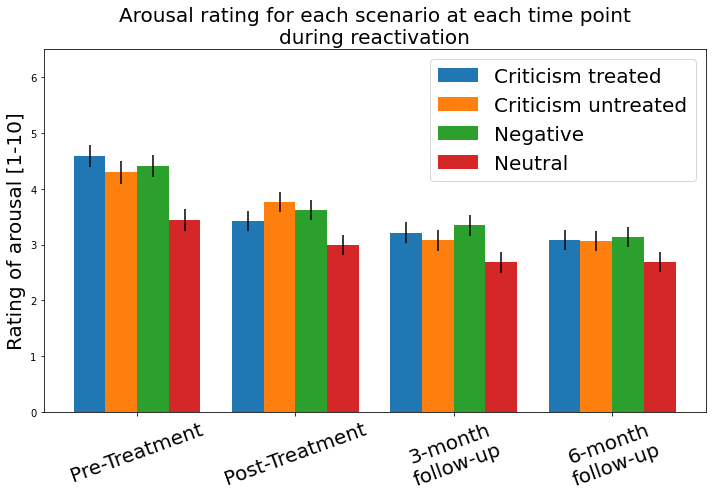

In [39]:
plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')].mean(),0.2,label='Criticism treated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X-0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Crit_')].mean(),0.2,label='Criticism untreated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X+0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neg')].mean(),0.2,label='Negative',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X+0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neut')].mean(),0.2,label='Neutral',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))

plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.legend(fontsize = 20)
plt.title('Arousal rating for each scenario at each time point\nduring reactivation',fontsize=20)
plt.ylabel('Rating of arousal [1-10]',fontsize=20)
plt.ylim([0,6.5])

plt.tight_layout()
plt.savefig('Emotions_rating_diff_scenario_reactivation.png')

In [24]:
result.loc[:,result.columns.str.contains('suspence')].head()

,SCL_TP1_CritT_suspence_mean,SCL_TP1_Crit_suspence_mean,SCL_TP1_Neg_suspence_mean,SCL_TP1_Neut_suspence_mean,SCL_TP2_CritT_suspence_mean,SCL_TP3_CritT_suspence_mean,SCL_TP4_CritT_suspence_mean,SCL_TP5_CritT_suspence_mean,SCL_TP61_CritT_suspence_mean,SCL_TP61_Crit_suspence_mean,...,rat_TP8_Future_IMM_suspence_mean,rat_TP8_Future_FOC_suspence_mean,rat_TP8_Future_HAP_suspence_mean,rat_TP8_Future_ANG_suspence_mean,rat_TP8_Future_SAD_suspence_mean,rat_TP8_Future_FEA_suspence_mean,rat_TP8_Future_GUI_suspence_mean,rat_TP8_Future_DIS_suspence_mean,rat_TP8_Future_ARO_suspence_mean,rat_TP8_Future_VAL_suspence_mean
0,-5.456229,-4.161710,-17.814569,-6.137750,-3.594003,-10.514457,-7.163302,-3.052758,-7.955858,-10.225097,...,8.000000,7.500000,2.500000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000
1,2.765031,-5.352860,-6.432730,-6.247705,-7.801952,-21.603263,-17.809309,0.656829,-16.463281,-8.514148,...,6.149689,6.139724,2.276621,1.831792,2.373632,2.365365,2.471421,1.927463,3.352511,4.274359
2,-0.504105,-10.454629,-0.266816,-4.066502,-22.325079,-21.059602,-25.455709,-16.036619,-23.270421,-1.991915,...,2.500000,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
3,5.006000,-7.912040,-2.590681,-7.833584,3.775867,-4.959485,3.861163,0.112919,0.945777,-0.099975,...,7.000000,6.000000,3.500000,4.000000,5.000000,4.000000,4.000000,2.000000,5.000000,4.500000
4,2.524639,-3.278813,0.433624,-4.840681,-6.068069,-7.100480,-5.281603,-19.614358,-7.133046,12.795709,...,5.000000,5.000000,3.500000,1.000000,2.000000,3.500000,3.000000,1.000000,4.000000,4.000000
